# How to cite 
@software{Alireza_Soroudi_PyomoOptimization, author = {Alireza Soroudi, Alireza}, license = {MIT}, title = {{PyomoOptimization}}, url = {https://github.com/OptimizationExpert/Pyomo%7D }

In [1]:
from pyomo.environ import *
import numpy as np 
import matplotlib.pyplot as plt

# Single level optimization problem
$$\min_{x,y} OF = 3x+y $$
$$(-x-4y+8) \leq 0  : \mu_1$$
$$(x+2y-13) \leq 0  : \mu_2$$
$$(x+y-8) \leq 0  : \mu_3$$
$$  1\leq x \leq 6 : \mu_4$$


# Bi-level optimization problem
$$\min_{x} OF_{upper} = 3x+y $$
$$  1\leq x \leq 6 : \mu_4$$
Subject to 
$$\min_{y} OF_{lower} = -y $$
$$(-x-4y+8) \leq 0  : \mu_1$$
$$(x+2y-13) \leq 0  : \mu_2$$
$$(x+y-8) \leq 0  : \mu_3$$


We need to replace the lower problem with its KKT conditions 

# KKT conditions: 
- Create Lagrangian      
$$\mathcal{L} = -y + \mu_1(-x-4y+8) +\mu_2(x+2y-13)+\mu_3(x+y-8)$$

- Differentiate to the lower leb=vel variable (y) = 0       
$$ \frac{\partial \mathcal{L}}{\partial y} = -1 -4\mu_1+2\mu_2+\mu_3 =0  $$

- Complementarity slackness conditions 
$$\mu_1(-x-4y+8)=0 $$
$$\mu_2(x+2y-13)=0$$
$$\mu_3(x+y-8)=0  $$
$$ \mu_i \geq 0 $$

- Original conditions: 
$$(-x-4y+8) \leq 0$$
$$(x+2y-13) \leq 0$$
$$(x+y-8) \leq 0$$
$$  1\leq x \leq 6 : \mu_4$$


# Pyomo code

# Single Objective problem

In [2]:
# create a model
model = AbstractModel()
# declare decision variables
model.x = Var(bounds= (1,6) , domain=Reals)
model.y = Var(domain=Reals)
# declare constraints
model.C1 = Constraint(expr = (-model.x-4*model.y+8) <= 0)
model.C2 = Constraint(expr = (model.x+2*model.y-13) <= 0)
model.C3 = Constraint(expr = (model.x+model.y-8) <= 0)
# declare objective
model.obj = Objective(expr = 3*model.x + model.y, sense=minimize)
opt = SolverFactory('glpk')
instance = model.create_instance()# solves and updates instance
results = opt.solve(instance)
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)
print(value(instance.obj))
print('x = ', round(value(instance.x),4) )
print('y = ', round(value(instance.y),4) )

feasible
4.75
x =  1.0
y =  1.75


# Bi-level Optimization problem

In [3]:
model = AbstractModel()
# declare decision variables
model.x = Var(bounds= (1,6) , domain=Reals)
model.y = Var(domain=Reals)
model.mu1 = Var(bounds= (0,None) , domain=Reals)
model.mu2 = Var(bounds= (0,None) , domain=Reals)
model.mu3 = Var(bounds= (0,None) , domain=Reals)

# declare constraints
model.C1 = Constraint(expr = (-model.x-4*model.y+8) <= 0)
model.C2 = Constraint(expr = (model.x+2*model.y-13) <= 0)
model.C3 = Constraint(expr = (model.x+model.y-8) <= 0)

model.D1 = Constraint(expr = model.mu1*(-model.x-4*model.y+8) == 0)
model.D2 = Constraint(expr = model.mu2*(model.x+2*model.y-13) == 0)
model.D3 = Constraint(expr = model.mu3*(model.x+model.y-8) == 0)

model.lagrngian = Constraint(expr = -1 -4*model.mu1+2*model.mu2+model.mu3 == 0)

# declare objective
model.obj = Objective(expr = 3*model.x + model.y, sense=minimize)
opt = SolverFactory('ipopt')
instance = model.create_instance()# solves and updates instance
results = opt.solve(instance)
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)
print('OF = ', round(value(instance.obj),4) )
print('x = ', round(value(instance.x),4) )
print('y = ', round(value(instance.y),4) )
print('mu1 = ', round(value(instance.mu1),4) )
print('mu2 = ', round(value(instance.mu2),4) )
print('mu3 = ', round(value(instance.mu3),4) )

feasible
OF =  14.0
x =  3.0
y =  5.0
mu1 =  0.0
mu2 =  0.25
mu3 =  0.5


# Multi-objective Optimization 

In [4]:
# create a model
model = AbstractModel()
# declare decision variables
model.x = Var(bounds= (1,6) , domain=Reals)
model.y = Var(domain=Reals)
model.limit = Param(initialize = -1000, mutable = True)
# declare constraints
model.C1 = Constraint(expr = (-model.x-4*model.y+8) <= 0)
model.C2 = Constraint(expr = (model.x+2*model.y-13) <= 0)
model.C3 = Constraint(expr = (model.x+model.y-8) <= 0)
model.C4 = Constraint(expr = -model.y >= model.limit)
# declare objective
model.of1 = Objective(expr = 3*model.x + model.y, sense=minimize)
model.of2 = Objective(expr = -model.y, sense=minimize)
opt = SolverFactory('glpk')
instance = model.create_instance()# solves and updates instance

In [5]:
instance.of1.activate()
instance.of2.deactivate()
results = opt.solve(instance)
print('x = ', round(value(instance.x),4) )
print('y = ', round(value(instance.y),4) )
max_of2 = value(-instance.y) 
min_of1 = value(instance.x + 3*instance.y) 
print(f'max of2 {max_of2} , min of1 {min_of1}')

x =  1.0
y =  1.75
max of2 -1.75 , min of1 6.25


In [6]:
instance.of2.activate()
instance.of1.deactivate()
results = opt.solve(instance)
print('x = ', round(value(instance.x),4) )
print('y = ', round(value(instance.y),4) )
min_of2 = value(instance.of2) 
max_of1 = value(3*instance.x + instance.y) 
print(f'min of2 {min_of2} , max of1 {max_of1}')

x =  1.0
y =  6.0
min of2 -6.0 , max of1 9.0


alpha = 0.0 , of2 -6.0 , of1 9.0 , (x,y) = (1.0,6.0)
alpha = 0.111 , of2 -5.528 , of1 8.528 , (x,y) = (1.0,5.528)
alpha = 0.222 , of2 -5.056 , of1 8.056 , (x,y) = (1.0,5.056)
alpha = 0.333 , of2 -4.583 , of1 7.583 , (x,y) = (1.0,4.583)
alpha = 0.444 , of2 -4.111 , of1 7.111 , (x,y) = (1.0,4.111)
alpha = 0.556 , of2 -3.639 , of1 6.639 , (x,y) = (1.0,3.639)
alpha = 0.667 , of2 -3.167 , of1 6.167 , (x,y) = (1.0,3.167)
alpha = 0.778 , of2 -2.694 , of1 5.694 , (x,y) = (1.0,2.694)
alpha = 0.889 , of2 -2.222 , of1 5.222 , (x,y) = (1.0,2.222)
alpha = 1.0 , of2 -1.75 , of1 4.75 , (x,y) = (1.0,1.75)


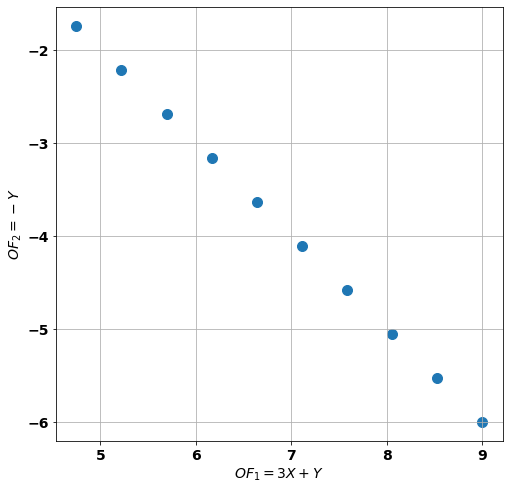

In [7]:
OF1 = []
OF2 = []
plt.figure(figsize=(8,8))
for alpha in np.linspace(0,1,10):
    instance.limit = (max_of2 - min_of2)*alpha + min_of2   
    results = opt.solve(instance)
    of2 = round(value(-instance.y),3)
    of1 = round(value(3*instance.x + instance.y),3)
    x= round(value(instance.x),3)
    y= round(value(instance.y),3)
    print(f'alpha = {round(alpha,3)} , of2 {of2} , of1 {of1} , (x,y) = ({x},{y})')
    OF1.append(of1)
    OF2.append(of2)
plt.xlabel('$OF_1 = 3X+Y$' , fontsize=14, fontweight='bold')
plt.ylabel('$OF_2 = - Y$', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

plt.grid()

plt.scatter(OF1,OF2,s=100)
plt.show()